### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn import metrics
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore")

### Loading the data from csv file to pandas dataframe

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
## Inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
## Shape of dataframe
df.shape

(301, 9)

In [6]:
## Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
## Check for missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
## Checking categories available in categorical columns

print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
## Checking the distribution of categorical data

print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Owner.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [10]:
## Creating a copy of dataset
df1 = df.copy()

In [11]:
df1.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


#### Adding a new column 'Duration' to get the ageing of the car and drop the 'Year' column from the dataset

In [12]:
df1['Duration']=2022-df1['Year']
df1.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Duration
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9


In [13]:
## 
df1.drop(['Year'],axis=1,inplace=True)
df1.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Duration
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9


### Encoding the Categorical Data

In [14]:
df1=pd.get_dummies(df1, columns= ['Fuel_Type','Seller_Type','Transmission'])
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Duration,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,sx4,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,ciaz,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,wagon r,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,swift,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


In [15]:
## correlation coefficient
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Duration,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
Duration,-0.236141,0.047584,0.524342,0.182104,1.000000,0.017790,-0.064315,0.059959,-0.039896,0.039896,0.000394,-0.000394
Fuel_Type_CNG,-0.025164,-0.011500,0.012223,-0.014272,0.017790,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.124269,-0.039896,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.060300,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240


### Splitting the data and Target

In [16]:
X = df1.drop(['Car_Name','Selling_Price'],axis=1)
Y = df1['Selling_Price']

print(X)
print(Y)

     Present_Price  Kms_Driven  Owner  Duration  Fuel_Type_CNG  \
0             5.59       27000      0         8              0   
1             9.54       43000      0         9              0   
2             9.85        6900      0         5              0   
3             4.15        5200      0        11              0   
4             6.87       42450      0         8              0   
..             ...         ...    ...       ...            ...   
296          11.60       33988      0         6              0   
297           5.90       60000      0         7              0   
298          11.00       87934      0        13              0   
299          12.50        9000      0         5              0   
300           5.90        5464      0         6              0   

     Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Dealer  \
0                   0                 1                   1   
1                   1                 0                   1   
2                 

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X, Y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[3.63290540e-01 4.07540682e-02 6.28099033e-04 7.41965893e-02
 6.50240766e-05 2.33564267e-01 1.00258493e-02 1.21821519e-01
 2.16197432e-03 7.13111988e-02 8.21808703e-02]


In [19]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Duration', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

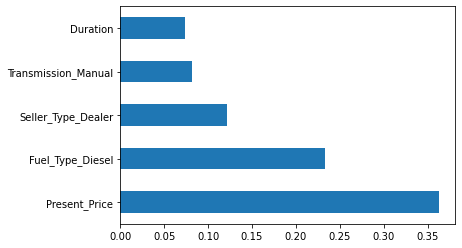

In [20]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind="barh")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 5)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(210, 11)
(91, 11)
(210,)


## Model Training

### 1. Random Forest Regressor

###### Random Forest Regressor is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make accurate regression predictions. It's suitable for tasks that require high accuracy and can handle large datasets.

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [24]:
## Train the model
rf_random.fit(X_train, Y_train)

RandomForestRegressor()

##### Model Evaluation

In [25]:
## Prediction on Training data
training_data_prediction1 = rf_random.predict(X_train)

In [26]:
## Mean and R squared Errors 

print("MAE : ", metrics.mean_absolute_error(Y_train, training_data_prediction1))
print("MSE : ", metrics.mean_squared_error(Y_train, training_data_prediction1))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction1)))
print("R squared Error : ", metrics.r2_score(Y_train, training_data_prediction1))

MAE :  0.2654090476190472
MSE :  0.44219785585714283
RMSE :  0.6649795905568402
R squared Error :  0.9840148860572578


#### Visualize the actual prices and Predicted prices

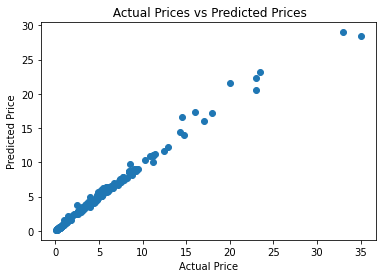

In [27]:
plt.scatter(Y_train, training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [28]:
## prediction on Test data
test_data_prediction1 = rf_random.predict(X_test)

In [29]:
## Mean and R squared Errors

print("MAE : ", metrics.mean_absolute_error(Y_test, test_data_prediction1))
print("MSE : ", metrics.mean_squared_error(Y_test, test_data_prediction1))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction1)))
print("R squared Error : ", metrics.r2_score(Y_test, test_data_prediction1))

MAE :  0.5103912087912092
MSE :  0.5776631283516489
RMSE :  0.7600415306755605
R squared Error :  0.9728947954800582


#### Visualize the actual prices and Predicted prices

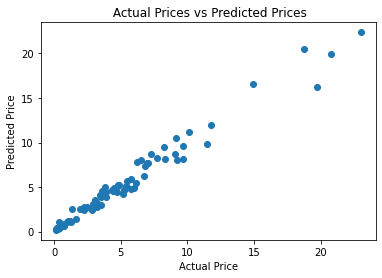

In [30]:
plt.scatter(Y_test, test_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### 2. Gradient Boosting Regressor

###### Gradient Boosting Regressor is an ensemble learning algorithm that builds a sequence of weak models, learning from the mistakes of previous models. It's suitable for ML tasks requiring high accuracy and can handle complex relationships and large datasets.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [32]:
## Train the model
gb.fit(X_train, Y_train)

GradientBoostingRegressor()

##### Model Evaluation

In [33]:
## Prediction on Training data
training_data_prediction2 = gb.predict(X_train)

In [34]:
## Mean and R squared Errors 

print("MAE : ", metrics.mean_absolute_error(Y_train, training_data_prediction2))
print("MSE : ", metrics.mean_squared_error(Y_train, training_data_prediction2))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction2)))
print("R squared Error : ", metrics.r2_score(Y_train, training_data_prediction2))

MAE :  0.1820229025456619
MSE :  0.06508936627269697
RMSE :  0.2551261771608256
R squared Error :  0.9976470692416336


#### Visualize the actual prices and Predicted prices

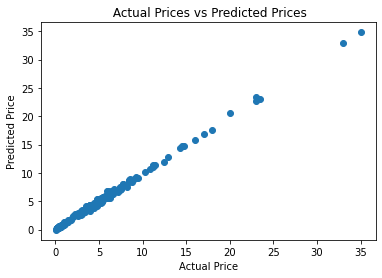

In [35]:
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [36]:
## prediction on Test data
test_data_prediction2 = gb.predict(X_test)

In [37]:
## Mean and R squared Errors

print("MAE : ", metrics.mean_absolute_error(Y_test, test_data_prediction2))
print("MSE : ", metrics.mean_squared_error(Y_test, test_data_prediction2))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction2)))
print("R squared Error : ", metrics.r2_score(Y_test, test_data_prediction2))

MAE :  0.6073460442923039
MSE :  0.8852158510192665
RMSE :  0.94085910263932
R squared Error :  0.9584637559356819


#### Visualize the actual prices and Predicted prices

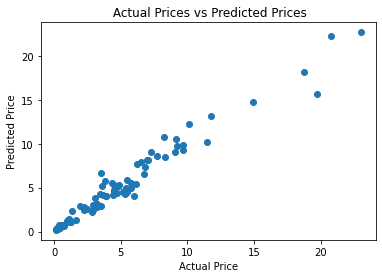

In [38]:
plt.scatter(Y_test, test_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Evaluating the Algorithms

In [39]:
score1 = metrics.r2_score(Y_test, test_data_prediction1)
score2 = metrics.r2_score(Y_test, test_data_prediction2)

print(score1, score2)

0.9728947954800582 0.9584637559356819


In [40]:
final_data = pd.DataFrame({'Models':['Random Forest Regressor', 'Gradient Boosting Regressor'], 
                           'R2_Score': [score1, score2]})

final_data

,Models,R2_Score
0,Random Forest Regressor,0.972895
1,Gradient Boosting Regressor,0.958464


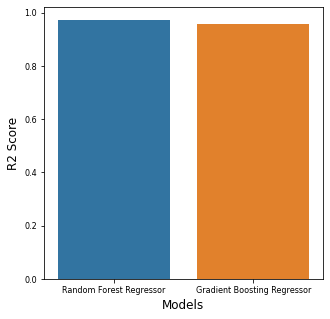

In [41]:
## Visualize the scores on barplot

plt.figure(figsize = (5, 5))
sns.barplot(final_data['Models'],final_data['R2_Score'])

# Set the axis labels and title
plt.xlabel('Models', fontsize= 12)
plt.ylabel('R2 Score', fontsize= 12)
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.show()

### Here both algorithms are having almost the same score and both can be used for the model. If want a best fit then we will go with Random Forest Regressor. 